# Visualization of the All SLAM Evaluations on the Simulator
- EKF SLAM (Accuracy and Speed)
- FastSLAM (Accuracy and Speed)
- Graph-based SLAM (Accuracy and Speed)


<img src="pic\sim_config01.png">

## How to use?
1. Please load the configuration file **config01.yaml** while starting the simulator;
2. Make sure that the attribute of **evalution** is enabled and **save_csv_data** is true;
3. Start the simulator and load one of the maps **slam_example_1** to **slam_example_8**;
4. Click the play button and let the simulator run for a while;
5. Click the button **Plot Slam Evaluation**, the estimation results will be shown in figures, and the raw data will be stored in the file **scripts/sobot_information1.csv** and **scripts/sobot_information2.csv** to analyse.
6. Run all cells in the notebook to obtain figures.
7. Run all cells in the notebook to obtain figures, make sure that the inital working directory is **"./sobot_rimulator/script"**
8. the resulting figures will be in the file **scripts/fig**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math
os.chdir('../')  # set the working directory as "./sobot_rimulator"
os.getcwd()

'/home/yixing/code/project_work'

In [2]:
# Path where the data is saved
# This file records the inaccuracies of SLAM
filename_evaluation = "scripts/sobot_information1.csv"  
# This file records the runtime of algorithms
filename_runtime = "scripts/sobot_information2.csv"

## 1. Accuray of the SLAM Evaluations
This analysis is based on the file sobot_information1.csv

In [3]:
df = pd.read_csv(filename_evaluation, index_col=0)
df.head(5)

,sim_circle,landmark_id,estimated_landmark_position,estimated_robot_pose,actual_landmark_position,actual_robot_pose,slam_name
0,10,52,"(0.10060011628500556, -0.3269232389263757)","(0.03503858262638248, -0.07558573262769268, -2...","(0.08672876526352813, -0.3484355423094351, -1....","(0.04353408280063603, -0.07127297463716915, -2...",EKF SLAM
1,10,52,"(0.1005274524940554, -0.32493695781109005)","(0.035725804269451614, -0.07340246086189228, -...","(0.08672876526352813, -0.3484355423094351, -1....","(0.04353408280063603, -0.07127297463716915, -2...",FastSLAM
2,11,52,"(0.10060011628500556, -0.3269232389263757)","(0.025349270966128372, -0.090023830925939, -2....","(0.08672876526352813, -0.3484355423094351, -1....","(0.03552066851884916, -0.08675590211872318, -2...",EKF SLAM
3,11,52,"(0.10267951703101169, -0.32746394781650323)","(0.026756356586633896, -0.0904967001901178, -2...","(0.08672876526352813, -0.3484355423094351, -1....","(0.03552066851884916, -0.08675590211872318, -2...",FastSLAM
4,12,52,"(0.10060011628500556, -0.3269232389263757)","(0.010564374015510964, -0.1055107910629187, -2...","(0.08672876526352813, -0.3484355423094351, -1....","(0.02165671881494718, -0.1030875003508545, -2....",EKF SLAM


In [4]:
df_lm = df[["sim_circle", "slam_name", "landmark_id", "estimated_landmark_position", "actual_landmark_position"]]
actual_landmark_position =  np.array([eval(x)[0:2] for x in df_lm["actual_landmark_position"].tolist()])
estimated_landmark_position = np.array([eval(x) for x in df_lm["estimated_landmark_position"].tolist()])
distance = np.linalg.norm(actual_landmark_position-estimated_landmark_position, axis = 1)
df_lm.loc[:, 'distance'] = distance

/home/yixing/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/yixing/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [5]:
df_lm_sum = df_lm.groupby(['sim_circle','slam_name'])["distance"].mean().unstack(level = -1)
df_lm_sum.tail(10)

slam_name,EKF SLAM,FastSLAM,Graph-based SLAM
sim_circle,,,
5157,0.086239,0.135024,0.034914
5158,0.085997,0.135031,0.034914
5159,0.085853,0.135038,0.034914
5160,0.085762,0.135046,0.034914
5161,0.085703,0.135061,0.034914
5162,0.085663,0.135079,0.034914
5163,0.085606,0.135099,0.034914
5164,0.085622,0.135121,0.034914
5165,0.085638,0.135146,0.034914


In [6]:
df_robot = df[["sim_circle","estimated_robot_pose","actual_robot_pose","slam_name"]]
df_robot = df_robot.drop_duplicates(["sim_circle", "slam_name"])
estimated_robot_pose = np.array([eval(x)[0:2] for x in df_robot["estimated_robot_pose"].tolist()])
actual_robot_pose = np.array([eval(x)[0:2] for x in df_robot["actual_robot_pose"].tolist()])
distance = np.linalg.norm(estimated_robot_pose-actual_robot_pose, axis = 1)
df_robot.loc[:, 'distance'] = distance
df_robot_pivot = df_robot.pivot(index = "sim_circle", columns = "slam_name", 
            values="distance")

## Average distance to true landmark in meters

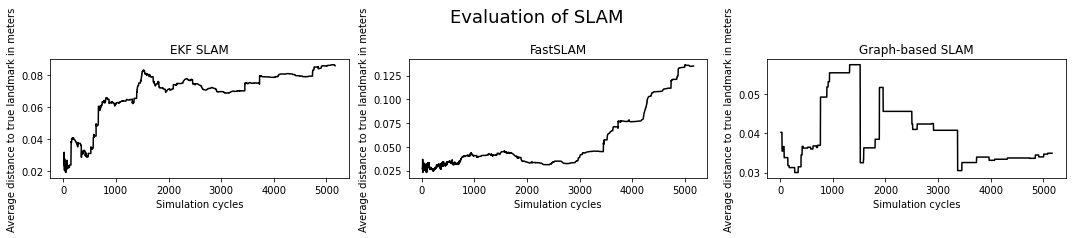

In [7]:
plt.subplot(1,3,1)
df_lm_sum["EKF SLAM"].plot(color = "k", rot = 0, figsize=(15,3))
plt.xlabel("Simulation cycles")
plt.ylabel("Average distance to true landmark in meters")
plt.title("EKF SLAM")
#plt.ylim(0,6)

plt.subplot(1,3,2)
df_lm_sum["FastSLAM"].plot(color = "k", rot = 0, figsize=(15,3))
plt.xlabel("Simulation cycles")
plt.ylabel("Average distance to true landmark in meters")
plt.title("FastSLAM")

plt.subplot(1,3,3)
df_lm_sum["Graph-based SLAM"].plot(color = "k", rot = 0, figsize=(15,3))
plt.xlabel("Simulation cycles")
plt.ylabel("Average distance to true landmark in meters")
plt.title("Graph-based SLAM")
plt.suptitle("Evaluation of SLAM", size = 18)
plt.tight_layout()
plt.savefig('./scripts/fig/{0}.eps'.format("fig1"), format='eps', bbox_inches='tight')

# Runtime for Update
This analysis is based on the file sobot_information2.csv

In [8]:
df2 = pd.read_csv(filename_runtime, index_col=0)
df2.head(5)

,sim_circle,name,time_per_update
0,1,EKF SLAM,0.000150
1,1,FastSLAM,0.006748
2,1,Graph-based SLAM,0.000042
3,2,EKF SLAM,0.000116
4,2,FastSLAM,0.008304


In [9]:
df2_mean = df2.groupby(["sim_circle", "name"])["time_per_update"].mean().unstack()
df2_mean.head(5)

name,EKF SLAM,FastSLAM,Graph-based SLAM
sim_circle,,,
1,0.000150,0.006748,0.000042
2,0.000116,0.008304,0.000069
3,0.000149,0.009091,0.000069
4,0.000097,0.009164,0.000106
5,0.000095,0.007286,0.000071


## 1. Cumulative Time Used for Updates 

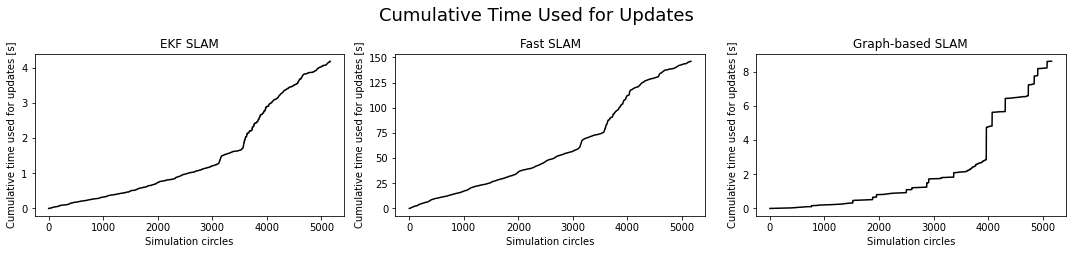

In [10]:
df2_cum = df2_mean.cumsum() #.plot(subplots=True, layout=(2,3), figsize = (12,8), rot = 0)

plt.subplot(2,3,1)

df2_cum["EKF SLAM"].plot(color = "k", rot = 0, figsize=(15,6))
plt.xlabel("Simulation circles")
plt.ylabel("Cumulative time used for updates [s]")
plt.title("EKF SLAM")

plt.subplot(2,3,2)
df2_cum["FastSLAM"].plot(color = "k", rot = 0, figsize=(15,6))
plt.xlabel("Simulation circles")
plt.ylabel("Cumulative time used for updates [s]")
plt.title("Fast SLAM")

plt.subplot(2,3,3)
df2_cum["Graph-based SLAM"].plot(color = "k", rot = 0, figsize=(15,6))
plt.xlabel("Simulation circles")
plt.ylabel("Cumulative time used for updates [s]")
plt.title("Graph-based SLAM")

plt.suptitle("Cumulative Time Used for Updates", size = 18)
plt.tight_layout()
plt.savefig('./scripts/fig/{0}.eps'.format("fig2"), format='eps', bbox_inches='tight')